# NumPy

## Lists in python

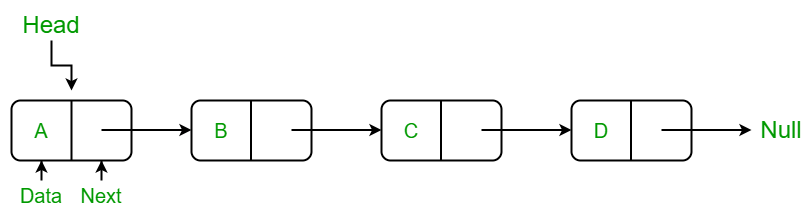

In [169]:
from IPython.display import Image, display

display(Image('/content/drive/MyDrive/Colab Files/LLdrawio.png'))

In [335]:
# Python lists can store mixed data types
lst = [1, 2.5, "hello", True]

print("List:", lst)
print("Types inside list:", [type(x) for x in lst])


List: [1, 2.5, 'hello', True]
Types inside list: [<class 'int'>, <class 'float'>, <class 'str'>, <class 'bool'>]


In [171]:
# Lists can grow and shrink easily
numbers = [1, 2, 3]
numbers.append(4)
numbers.extend([5, 6])

print(numbers)

[1, 2, 3, 4, 5, 6]


In [336]:
import sys

big_list = list(range(100000))   # 100k items

print("List object overhead:", sys.getsizeof(big_list), "bytes")
print("Estimated total element memory:", sum(sys.getsizeof(x) for x in big_list), "bytes")


List object overhead: 800056 bytes
Estimated total element memory: 2800000 bytes


In [173]:
# Multiply each element by 2
lst = list(range(10))

result = []
for x in lst:
  result.append(2*x)
print(result)


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [337]:
import time

lst = list(range(20_000_000))

# Pure Python loop
start = time.time()
result = []
for x in lst:
  result.append(2*x)
end = time.time()

print("Time:", end - start, "seconds")


Time: 2.1765310764312744 seconds


In [175]:
# Try to "add" two lists
a = [1, 2, 3]
b = [4, 5, 6]

try:
    print(a + b)       # concatenation, not arithmetic addition
    print(a * 3)       # repetition, not scalar multiplication
    print(a - b)
except Exception as e:
    print("Error:", e)


[1, 2, 3, 4, 5, 6]
[1, 2, 3, 1, 2, 3, 1, 2, 3]
Error: unsupported operand type(s) for -: 'list' and 'list'


## NumPy Arrays

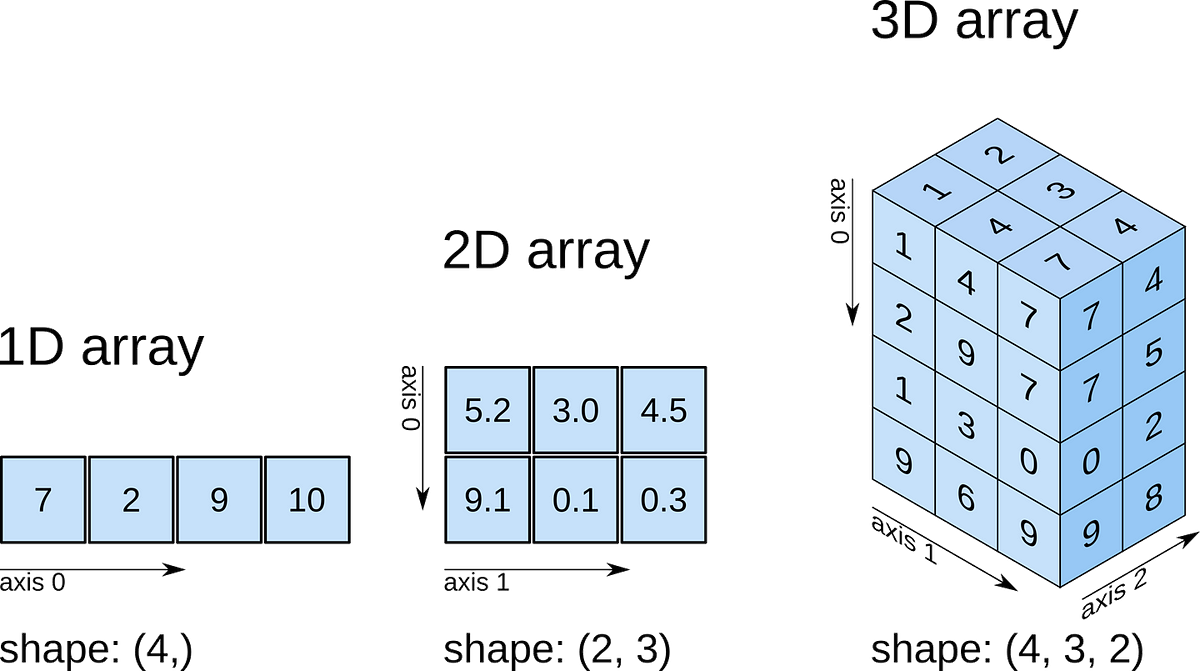

In [176]:
display(Image('/content/drive/MyDrive/Colab Files/nd_arrays.png'))

In [ ]:
!pip install numpy

In [177]:
import numpy as np

np.__version__


'2.0.2'

In [178]:
lst = [1, 2, 3, 4]
arr = np.array(lst)
arr

array([1, 2, 3, 4])

In [179]:
arr.dtype

dtype('int64')

In [180]:
mixed = np.array([1, 2.5, 3])
mixed, mixed.dtype

(array([1. , 2.5, 3. ]), dtype('float64'))

In [181]:
lst = [1, 2, 3]
arr = np.array([1, 2, 3])

print("List:", lst + lst)
print("Array:", arr + arr)

List: [1, 2, 3, 1, 2, 3]
Array: [2 4 6]


In [182]:
import sys

lst = list(range(1000))
arr = np.array(lst)

print("List element size:", sys.getsizeof(lst[0]), "bytes each")
print("Array element size:", arr.itemsize, "bytes each")

print("Total list size:", sys.getsizeof(lst) + sum(sys.getsizeof(x) for x in lst))
print("Total array size:", arr.nbytes)


List element size: 28 bytes each
Array element size: 8 bytes each
Total list size: 36056
Total array size: 8000


In [183]:
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print("Array:\n", arr)

print("ndim:", arr.ndim)   # number of dimensions
print("shape:", arr.shape) # rows & columns
print("size:", arr.size)   # total elements
print("dtype:", arr.dtype) # data type


Array:
 [[1 2 3]
 [4 5 6]]
ndim: 2
shape: (2, 3)
size: 6
dtype: int64


In [340]:
try:
  a = np.array([[1,2,'hello'],[3,4,5]])
  print(a)
except Exception as e:
  print(e)

[['1' '2' 'hello']
 ['3' '4' '5']]


## NumPy Data-types

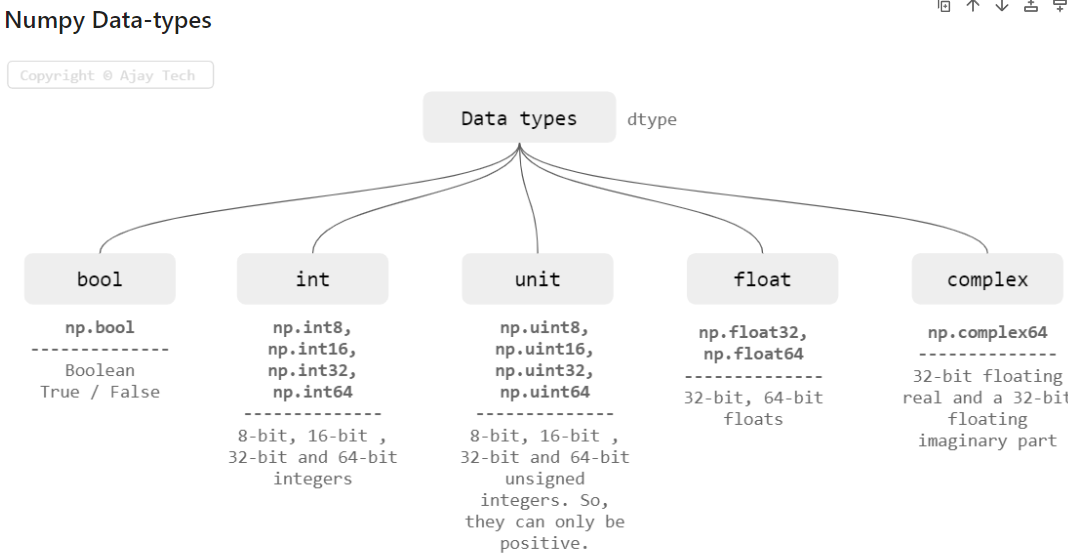

In [185]:
display(Image('/content/drive/MyDrive/Colab Files/np dtypes.png'))

In [186]:
arr_int = np.array([1, 2, 3])
arr_float = np.array([1.0, 2.5, 3.9])
arr_mixed = np.array([1, 2.5, 3])

print(arr_int.dtype)
print(arr_float.dtype)
print(arr_mixed.dtype)


int64
float64
float64


In [343]:
arr = np.array([1, 2, 3], dtype = np.int8)
print(arr)
print(arr.dtype)

[1 2 3]
int8


In [188]:
arr8  = np.array([1, 2, 3], dtype=np.int8)
arr32 = np.array([1, 2, 3], dtype=np.int32)
arr64 = np.array([1, 2, 3], dtype=np.int64)

print(arr8.nbytes)
print(arr32.nbytes)
print(arr64.nbytes)


3
12
24


In [189]:
arr = np.array([1.2, 2.8, 3.9])

int_arr = arr.astype(np.int32)
float_arr = int_arr.astype(np.float64)

print(int_arr)
print(int_arr.dtype)
print(float_arr.dtype)


[1 2 3]
int32
float64


In [190]:
arr = np.array(["1", "2", "3"])
arr, arr.dtype


(array(['1', '2', '3'], dtype='<U1'), dtype('<U1'))

## Structured Arrays

In [191]:
student_dtype = np.dtype([
    ("name", "U10"),   # string (max length 10)
    ("age", "i4"),     # 32-bit integer
    ("grade", "f4")    # 32-bit float
])


In [192]:
students = np.array([
    ("Ali", 21, 88.5),
    ("Sara", 20, 92.0),
    ("Omar", 22, 79.3)
], dtype=student_dtype)

students


array([('Ali', 21, 88.5), ('Sara', 20, 92. ), ('Omar', 22, 79.3)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('grade', '<f4')])

In [344]:
students.shape

(3,)

In [193]:
print(students[0])
print(students["name"])
print(students["age"])
print(students["grade"])


('Ali', 21, 88.5)
['Ali' 'Sara' 'Omar']
[21 20 22]
[88.5 92.  79.3]


In [346]:
students["grade"] > 85

array([ True,  True, False])

In [347]:
high_achievers = students[students["grade"] > 85]
high_achievers



array([('Ali', 21, 90.5), ('Sara', 20, 94. )],
      dtype=[('name', '<U10'), ('age', '<i4'), ('grade', '<f4')])

In [351]:
students["age"] += 1
students


array([('Ali', 24, 92.5), ('Sara', 23, 96. ), ('Omar', 25, 83.3)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('grade', '<f4')])

In [196]:
for rec in students:
    print(f"{rec['name']} is {rec['age']} years old and got {rec['grade']}.")


Ali is 21 years old and got 90.5.
Sara is 20 years old and got 94.0.
Omar is 22 years old and got 81.30000305175781.


## Array Shape

In [197]:
arr = np.array([1, 2, 3, 4])
print(arr.shape)

(4,)


In [198]:
arr2d = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

print(arr2d)
print(arr2d.shape)


[[1 2 3]
 [4 5 6]]
(2, 3)


In [199]:
arr3d = np.array([
    [
        [1, 2, 3],
        [4, 5, 6]
    ],
    [
        [7, 8, 9],
        [10, 11, 12]
    ]
])

arr3d.shape


(2, 2, 3)

In [200]:
print("1D ndim:", arr.ndim)
print("2D ndim:", arr2d.ndim)
print("3D ndim:", arr3d.ndim)


1D ndim: 1
2D ndim: 2
3D ndim: 3


In [201]:
a = np.array([1, 2, 3, 4, 5, 6])
print("1D shape:", a.shape)

b = np.array([[1, 2, 3, 4, 5, 6]])
print("2D (row) shape:", b.shape)

c = np.array([[1],
              [2],
              [3],
              [4],
              [5],
              [6]])
print("2D (column) shape:", c.shape)


1D shape: (6,)
2D (row) shape: (1, 6)
2D (column) shape: (6, 1)


## Append Item

In [352]:
arr = np.array([1, 2, 3])
new_arr = np.append(arr, 4)
arr[0] = 5

print(arr)
print(new_arr)


[5 2 3]
[1 2 3 4]


In [353]:
arr = np.array([1, 2, 3])
new_arr = np.append(arr, [4, 5, 6])
new_arr = np.append(new_arr, np.array([7,8,9]))
new_arr


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [204]:
arr2d = np.array([[1, 2, 3],
                  [4, 5, 6]])

new_row = [7, 8, 9]

result = np.append(arr2d, [new_row])
result


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [356]:
arr2d = np.array([[1, 2, 3],
                  [4, 5, 6]])

# Append a new row → must match number of columns
new_row = np.array([7, 8, 9])

print(arr2d.shape)
print(new_row.shape)

result = np.append(arr2d, [[7,8,9]], axis = 0)
result


(2, 3)
(3,)


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [359]:
# Append a new column → must match number of rows
new_col = np.array(
          [[7],
           [8]])

print(arr2d.shape)
print(new_col.shape)

result = np.append(arr2d, new_col, axis=1)
result


(2, 3)
(2, 1)


array([[1, 2, 3, 7],
       [4, 5, 6, 8]])

In [362]:
arr2d = np.array([[1, 2, 3],
                  [4, 5, 6]])

bad_row = [[7], [8]]  # only 2 elements, but array expects 3

try:
    a = np.append(arr2d, bad_row, axis=1)
    print(a)
except Exception as e:
    print("Error:", e)


[[1 2 3 7]
 [4 5 6 8]]


In [208]:
arr2d = np.array([[1, 2, 3],
                  [4, 5, 6]])

result = np.append(arr2d, [7, 8, 9])
print(result)
print(result.shape)


[1 2 3 4 5 6 7 8 9]
(9,)


In [209]:
arr2d = np.array([[1, 2, 3],
                  [4, 5, 6]])

result = np.append(arr2d, [[7, 8, 9]])
print(result)
print(result.shape)


[1 2 3 4 5 6 7 8 9]
(9,)


In [210]:
arr = np.array([])
for i in range(5):
    arr = np.append(arr, i)

arr


array([0., 1., 2., 3., 4.])

## Reshape

In [365]:
arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
reshaped = arr.reshape(3, 4)

print(arr,'\n')
print(reshaped)
print('-'*50)
print(arr.shape)
print(reshaped.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
--------------------------------------------------
(12,)
(3, 4)


In [366]:
print(arr.reshape(6, -1))
print('-'*50)
print(arr.reshape(-1, 6))

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
--------------------------------------------------
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


In [370]:
arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
b = arr.reshape(2,-1,2)
b.shape
print(b)

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]


In [371]:
arr = np.array([1,2,3,4,5,6,7,8,9,10])

try:
    arr.reshape(3, 4)
except Exception as e:
    print("Error:", e)


Error: cannot reshape array of size 10 into shape (3,4)


In [214]:
arr2d = np.array([[1, 2, 3],
                  [4, 5, 6]])

r = arr2d.reshape(6)
r[0] = 99

print(arr2d)
print(r)


[[99  2  3]
 [ 4  5  6]]
[99  2  3  4  5  6]


In [215]:
arr2d = np.array([[1, 2, 3],
                  [4, 5, 6]])

r = arr2d.ravel()
r[0] = 99

print(arr2d)
print(r)


[[99  2  3]
 [ 4  5  6]]
[99  2  3  4  5  6]


In [216]:
f = arr2d.flatten()
f[0] = 123

print(arr2d)
print(f)


[[99  2  3]
 [ 4  5  6]]
[123   2   3   4   5   6]


In [217]:
arr = np.array([1,2,3,4,5,6])
arr.resize(2, 3)
arr


array([[1, 2, 3],
       [4, 5, 6]])

In [218]:
arr = np.array([1,2,3,4])
arr.resize(3, 3)  # expands
arr


array([[1, 2, 3],
       [4, 0, 0],
       [0, 0, 0]])

In [374]:
arr = np.array([1,2,3,4])
arr.resize(3,3)

In [219]:
arr3 = np.array([[[1, 2, 3]]])  # shape (1,1,3)

squeezed = arr3.squeeze()
arr3.shape, squeezed.shape


((1, 1, 3), (3,))

In [220]:
arr3reshaped = arr3.reshape(1,3,1)
squeezed = arr3reshaped.squeeze()
print(arr3reshaped)
print(arr3reshaped.shape)
print(squeezed.shape)

[[[1]
  [2]
  [3]]]
(1, 3, 1)
(3,)


In [378]:
arr = np.array([1,2,3,4,5,6])
arr = arr.reshape(2,3)
arr.shape
arr = arr.reshape(1,2,1,3)
s = arr.squeeze()
print(arr.shape)
print(s.shape)

(1, 2, 1, 3)
(2, 3)


## Mathematical Operations

In [380]:
arr = np.array([1, 2, 3, 4])

print("Add        :", arr + 10)
print("Subtract   :", arr - 1)
print("Multiply   :", arr * 2)
print("Divide     :", arr / 2)
print("Power      :", arr ** 2)
print("Mod      :", arr % 2)
print("greater than 2      :", arr > 2)


Add        : [11 12 13 14]
Subtract   : [0 1 2 3]
Multiply   : [2 4 6 8]
Divide     : [0.5 1.  1.5 2. ]
Power      : [ 1  4  9 16]
Mod      : [1 0 1 0]
greater than 2      : [False False  True  True]


In [381]:
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])

print("a + b =", a + b)
print("a - b =", a - b)
print("a * b =", a * b)
print("a / b =", a / b)
print("a % b =", a % b)


a + b = [11 22 33]
a - b = [ -9 -18 -27]
a * b = [10 40 90]
a / b = [0.1 0.1 0.1]
a % b = [1 2 3]


In [383]:
arr = np.array([1, 2, 3, 4, 5])

print(arr > 3)
print(arr <= 2)
print(arr == 4)

bool_arr = arr > 3

print(bool_arr.dtype)


[False False False  True  True]
[ True  True False False False]
[False False False  True False]
bool


In [224]:
arr = np.array([10, 15, 20, 25, 30])

mask = (arr > 12) & (arr < 28)
print(mask)
print(arr[mask])


[False  True  True  True False]
[15 20 25]


In [225]:
arr = np.array([1, 2, 3, 4, 5], dtype=float)

print("sqrt:", np.sqrt(arr))
print("exp :", np.exp(arr))
print("sin :", np.sin(arr))
print("log :", np.log(arr))


sqrt: [1.         1.41421356 1.73205081 2.         2.23606798]
exp : [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]
sin : [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]
log : [0.         0.69314718 1.09861229 1.38629436 1.60943791]


In [226]:
arr2d = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

print("Sum of each column:", np.sum(arr2d, axis=0))
print("Sum of each row   :", np.sum(arr2d, axis=1))


Sum of each column: [5 7 9]
Sum of each row   : [ 6 15]


In [227]:
arr = np.array([-3, -1, 0, 2, 5])

print("abs :", np.abs(arr))
print("sign:", np.sign(arr))


abs : [3 1 0 2 5]
sign: [-1 -1  0  1  1]


In [228]:
arr = np.array([1, 2, 3, 4])

print(arr + 5)
print(arr * 5)
print('-'*50)
## this is equivalent to

scaler = np.array([5,5,5,5])
print(arr + scaler)
print(arr * scaler)



[6 7 8 9]
[ 5 10 15 20]
--------------------------------------------------
[6 7 8 9]
[ 5 10 15 20]


## Generating Data

### `zeros` and `ones`

In [384]:
import numpy as np

a = np.zeros(5)
b = np.zeros((2, 3))

print(a)
print(b)
print(a.dtype)


[0. 0. 0. 0. 0.]
[[0. 0. 0.]
 [0. 0. 0.]]
float64


In [230]:
np.zeros((2, 2), dtype=int)


array([[0, 0],
       [0, 0]])

In [231]:
np.ones(4), np.ones((3, 2))


(array([1., 1., 1., 1.]),
 array([[1., 1.],
        [1., 1.],
        [1., 1.]]))

In [232]:
np.full((3, 3), 7)


array([[7, 7, 7],
       [7, 7, 7],
       [7, 7, 7]])

In [387]:
a = np.zeros((3,4))
b = np.ones_like(a)

print(a.shape)
print(b.shape)
print(a)
print(b)

(3, 4)
(3, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### `arange`

In [ ]:
# np.arange(start, end, step)
# end is excluded

In [233]:
np.arange(0, 10, 2)


array([0, 2, 4, 6, 8])

In [388]:
np.arange(0, .9, 0.2)


array([0. , 0.2, 0.4, 0.6, 0.8])

### `linspace`

In [ ]:
# np.linspace(start, end, number of elements)
# end is included

In [235]:
np.linspace(0, 1, 5)


array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [236]:
np.linspace(0, 10, 4)  # includes both 0 and 10


array([ 0.        ,  3.33333333,  6.66666667, 10.        ])

### `random`

In [237]:
print(np.random.randn(10))      # 10 random floats
print(np.random.randn(2,3)) # 2x3 matrix of random floats


[ 1.18631023  1.2455633   1.43427011 -0.30215768  0.72724282  0.27417793
  0.75162223  1.41064944  0.52832541  0.36708911]
[[ 1.26494069 -1.6115873   1.14843416]
 [-0.44017031 -0.10487601  0.08674543]]


In [ ]:
# np.random.randint(start, end, shape)
# end is excluded

In [398]:
np.random.seed(1234)
print(np.random.randint(0,10,10))
print(np.random.randint(0,10,(4,4)))

[3 6 5 4 8 9 1 7 9 6]
[[8 0 5 0]
 [9 6 2 0]
 [5 2 6 3]
 [7 0 9 0]]


In [402]:
arr = np.arange(1,100,2)
np.random.choice(arr, size=5)

array([47, 27, 65, 25, 11])

In [240]:
print("arange:", np.arange(0, 1, 0.3))
print("linspace:", np.linspace(0, 1, 4))


arange: [0.  0.3 0.6 0.9]
linspace: [0.         0.33333333 0.66666667 1.        ]


## Speed Test

In [403]:
import time
N = 50_000_000  # 50 million elements

py_list = list(range(N))
np_array = np.arange(N)


In [404]:
start = time.time()
result_list = [x * 2 for x in py_list]
end = time.time()

print(f"Python list time: {end - start:.6f} seconds")

Python list time: 7.243817 seconds


In [405]:
start = time.time()
result_np = np_array * 2
end = time.time()

print(f"NumPy array time: {end - start:.6f} seconds")


NumPy array time: 0.191854 seconds


In [406]:
setup_code = "py_list = list(range(500_000))"  # 500k for quicker timeit
test_code  = "[x * 2 for x in py_list]"

import timeit
list_time = timeit.timeit(test_code, setup=setup_code, number=10)

print(f"Python list average time: {list_time / 10:.6f} seconds per run")


Python list average time: 0.031433 seconds per run


In [407]:
setup_code = "import numpy as np; np_arr = np.arange(500_000)"
test_code  = "np_arr * 2"

np_time = timeit.timeit(test_code, setup=setup_code, number=10)

print(f"NumPy array average time: {np_time / 10:.6f} seconds per run")


NumPy array average time: 0.001124 seconds per run


In [408]:
print("==== Final Comparison ====")
print(f"Python list  : {list_time / 10:.6f} seconds/run")
print(f"NumPy array  : {np_time / 10:.6f} seconds/run")
print("\nSpeedup ≈ {:.1f}x faster".format((list_time / 10) / (np_time / 10)))


==== Final Comparison ====
Python list  : 0.031433 seconds/run
NumPy array  : 0.001124 seconds/run

Speedup ≈ 28.0x faster


## Indexing and Slicing

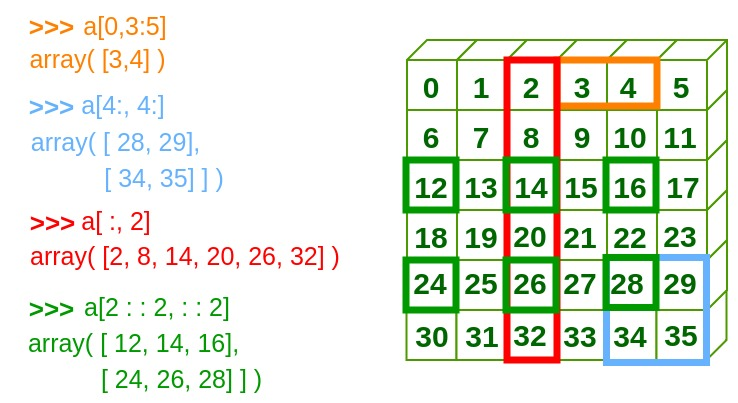

In [247]:
display(Image('/content/drive/MyDrive/Colab Files/Numpy1.jpg'))

In [ ]:
#a[row_indexing, col_indexing]

In [409]:
arr = np.array([10, 20, 30, 40, 50])

print(arr[0])   # first element
print(arr[2])   # third element
print(arr[-1])  # last element


10
30
50


In [249]:
arr = np.array([10, 20, 30, 40, 50])

print(arr[1:4])   # elements from index 1 to 3
print(arr[:3])    # first three
print(arr[2:])    # from index 2 to end
print(arr[:])     # full copy view


[20 30 40]
[10 20 30]
[30 40 50]
[10 20 30 40 50]


In [410]:
arr2 = arr[1:4]
arr2[0] = 100
print(arr)
print(arr2)

[ 10 100  30  40  50]
[100  30  40]


In [250]:
print(arr[::2])  # every 2nd element
print(arr[1::2]) # start at index 1, step 2
print(arr[::-1]) # reversed array


[10 30 50]
[20 40]
[50 40 30 20 10]


In [251]:
arr = np.array([1, 2, 3, 4, 5])
view = arr[1:4]

view[0] = 999

print(arr)
print(view)


[  1 999   3   4   5]
[999   3   4]


In [413]:
arr2d = np.array([
    [ 1,  2,  3],
    [ 4,  5,  6],
    [ 7,  8,  9]
])

print(arr2d[0, 0])  # top-left
print(arr2d[1, 2])  # row 1, col 2
print(arr2d[-1, -1]) # bottom-right


1
6
9


In [414]:
print(arr2d[1])      # row as a 1D array
print(arr2d[1, :])   # same result


[4 5 6]
[4 5 6]


In [415]:
print(arr2d[:, 0])   # first column
print(arr2d[:, -1])  # last column


[1 4 7]
[3 6 9]


In [255]:
print(arr2d[0:2, 0:2])   # top-left 2x2
print(arr2d[1:, 1:])     # bottom-right 2x2


[[1 2]
 [4 5]]
[[5 6]
 [8 9]]


In [256]:
print(arr2d[::2, ::2])  # every other row & column


[[1 3]
 [7 9]]


In [422]:
arr = np.arange(36).reshape(6,6)
print(arr)
print('\n')
print(arr[:,::2])

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]


[[ 0  2  4]
 [ 6  8 10]
 [12 14 16]
 [18 20 22]
 [24 26 28]
 [30 32 34]]


In [423]:
arr = np.array([10,20,30,40,50,60,70])
x = arr[[1, 3, 6]]

print(x)


[20 40 70]


## Boolean Mask Arrays

In [258]:
arr = np.array([5, 12, 7, 30, 2])

mask = arr > 10
print(mask)
print(arr[mask])


[False  True False  True False]
[12 30]


In [259]:
arr2d = np.array([
    [10, 20,  5],
    [40,  3, 12]
])

mask = arr2d > 10
arr2d[mask]


array([20, 40, 12])

## Arrays as Images

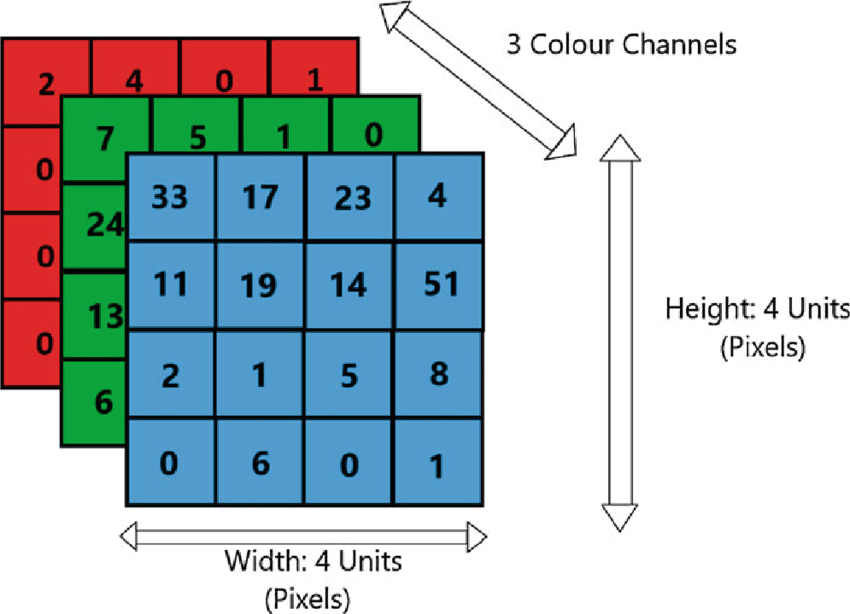

In [260]:
display(Image('/content/drive/MyDrive/Colab Files/A-3D-tensor-of-a-Red-Green-Blue-RGB-image-of-a-dimension-of-4-A-4-A-3.png'))

In [261]:
import numpy as np
import matplotlib.pyplot as plt


(256,)
(256, 256)


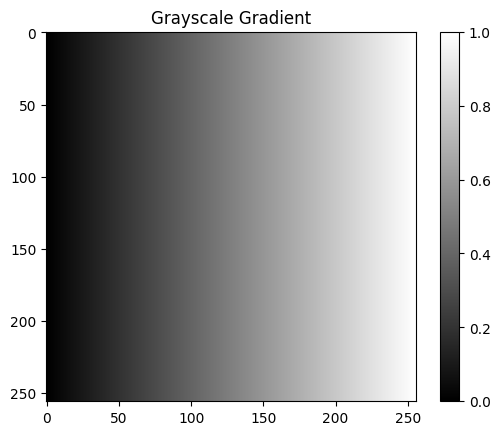

In [427]:
# Create a 2D gradient matrix
img = np.linspace(0, 1, 256)        # 256 values from 0 to 1
print(img.shape)

img = np.tile(img, (256, 1))        # make 256 rows

print(img.shape)

plt.imshow(img, cmap='gray')
plt.title("Grayscale Gradient")
plt.colorbar()
plt.show()


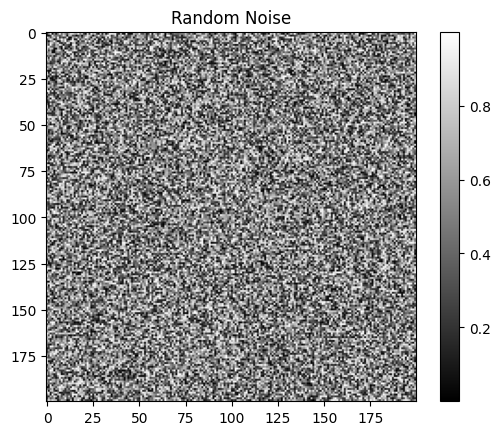

In [263]:
random_img = np.random.random((200, 200))

plt.imshow(random_img, cmap="gray")
plt.title("Random Noise")
plt.colorbar()
plt.show()


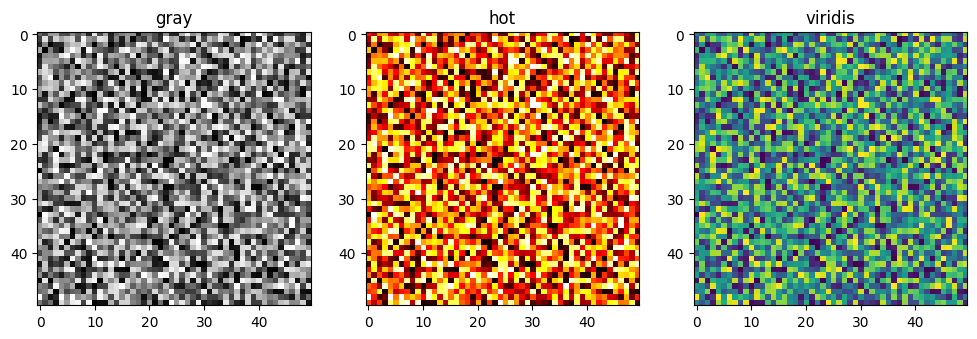

In [264]:
matrix = np.random.random((50, 50))

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(matrix, cmap="gray")
plt.title("gray")

plt.subplot(1, 3, 2)
plt.imshow(matrix, cmap="hot")
plt.title("hot")

plt.subplot(1, 3, 3)
plt.imshow(matrix, cmap="viridis")
plt.title("viridis")

plt.show()


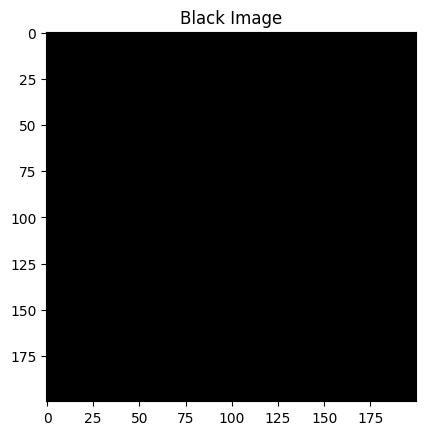

In [265]:
img = np.zeros((200, 200))

plt.imshow(img, cmap="gray")
plt.title("Black Image")
plt.show()


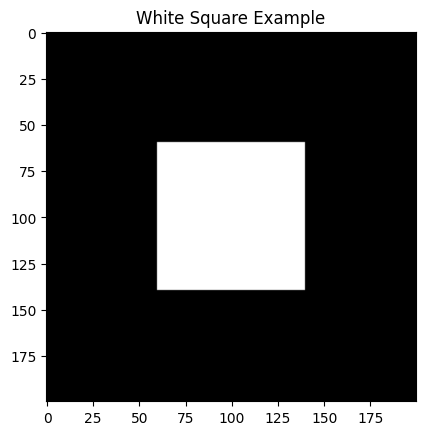

In [429]:
img = np.zeros((200, 200))

# Draw a white square in the center
img[60:140,60:140] = 1

plt.imshow(img, cmap="gray")
plt.title("White Square Example")
plt.show()


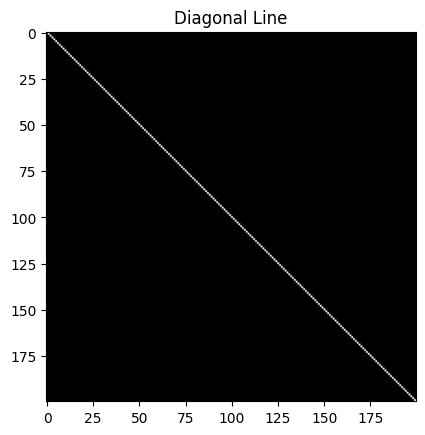

In [267]:
img = np.zeros((200, 200))
np.fill_diagonal(img, 1)

plt.imshow(img, cmap="gray")
plt.title("Diagonal Line")
plt.show()


(100, 300, 3)


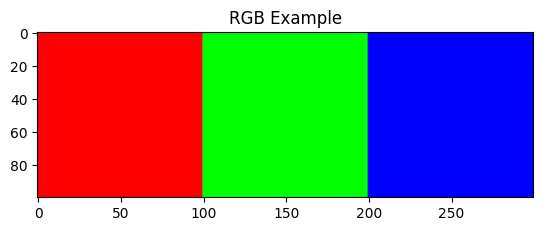

In [438]:
img = np.zeros((100, 300, 3))  # H × W × 3 for RGB

print(img.shape)

# Red stripe
img[:, 0:100, 0] = 1

# Green stripe
img[:, 100:200, 1] = 1

# Blue stripe
img[:, 200:300, 2] = 1

plt.imshow(img)
plt.title("RGB Example")
plt.show()


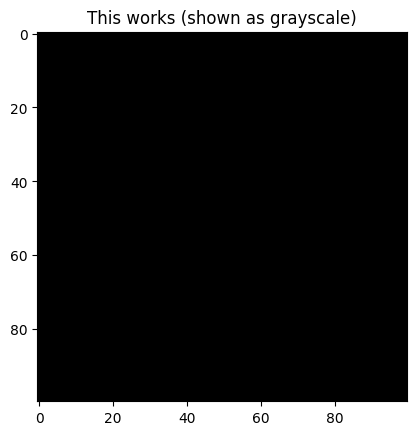

Error: Invalid shape (100, 100, 2) for image data


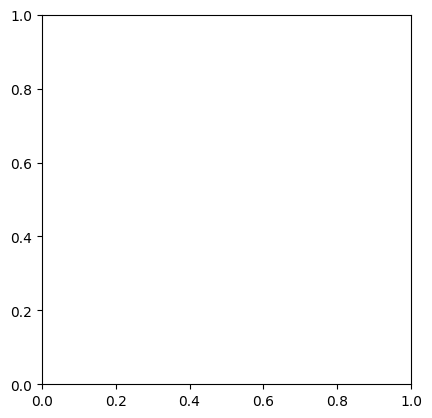

In [439]:
bad_img = np.zeros((100, 100))  # only 2D

try:
    plt.imshow(bad_img, cmap='gray')
    plt.title("This works (shown as grayscale)")
    plt.show()

    bad_rgb = np.zeros((100, 100, 2))  # only 2 channels
    plt.imshow(bad_rgb)
except Exception as e:
    print("Error:", e)


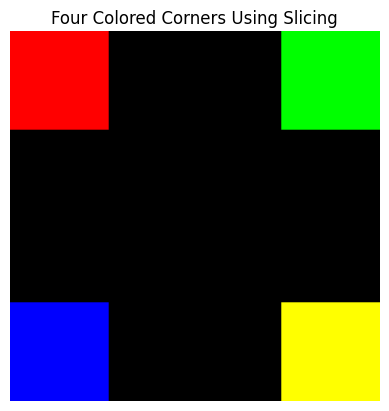

In [442]:
# Create blank RGB image
img = np.zeros((300, 300, 3))

h, w, _ = img.shape
s = 80  # size of corner squares


# Top-left (red)
img[0:s, 0:s] = [1, 0, 0]

# Top-right (green)
img[0:s, w-s:w] = [0, 1, 0]

# Bottom-left (blue)
img[h-s:h, 0:s] = [0, 0, 1]

# Bottom-right (yellow)
img[h-s:h, w-s:w] = [1, 1, 0]

plt.imshow(img)
plt.title("Four Colored Corners Using Slicing")
plt.axis("off")
plt.show()


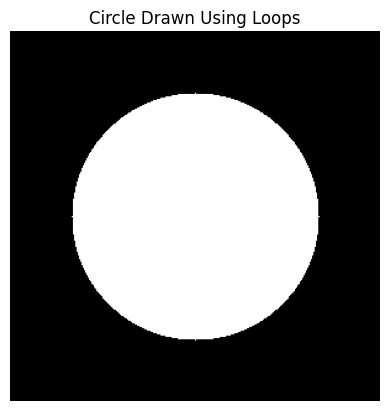

In [271]:
# Blank grayscale image
img = np.zeros((300, 300))

h, w = img.shape

# Circle parameters
cx, cy = h // 2, w // 2  # center
r = 100                  # radius

# Loop over all pixels
for i in range(h):
    for j in range(w):

        # Compute distance from center
        dist_sq = (i - cx)**2 + (j - cy)**2

        # If inside the circle, color white
        if dist_sq <= r*r:
            img[i, j] = 1

plt.imshow(img, cmap="gray")
plt.title("Circle Drawn Using Loops")
plt.axis("off")
plt.show()


## Statistics operations

In [443]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

print("Sum       :", np.sum(arr))
print("Mean      :", np.mean(arr))
print("Median    :", np.median(arr))
print("Min       :", np.min(arr))
print("Max       :", np.max(arr))
print("Std dev   :", np.std(arr))
print("Variance  :", np.var(arr))


Sum       : 15
Mean      : 3.0
Median    : 3.0
Min       : 1
Max       : 5
Std dev   : 1.4142135623730951
Variance  : 2.0


In [273]:
arr2d = np.array([
    [1,  2,  3],
    [4,  5,  6],
    [7,  8,  9]
])

print("Column means:", np.mean(arr2d, axis=0))
print("Row means   :", np.mean(arr2d, axis=1))


Column means: [4. 5. 6.]
Row means   : [2. 5. 8.]


In [274]:
print("Column medians:", np.median(arr2d, axis=0))
print("Row medians   :", np.median(arr2d, axis=1))


Column medians: [4. 5. 6.]
Row medians   : [2. 5. 8.]


In [275]:
data = np.array([1, 3, 5, 7, 9, 11, 20])

print("25th percentile:", np.percentile(data, 25))
print("50th percentile:", np.percentile(data, 50))  # median
print("90th percentile:", np.percentile(data, 90))


25th percentile: 4.0
50th percentile: 7.0
90th percentile: 14.600000000000003


In [276]:
arr = np.array([10, 2, 30, 5, 8])

print("Min value index:", np.argmin(arr))
print("Max value index:", np.argmax(arr))


Min value index: 1
Max value index: 2


In [277]:
arr2d = np.array([
    [5, 12, 7],
    [1,  9, 2]
])

print("Index of min (flat):", np.argmin(arr2d))
print("Index of max (flat):", np.argmax(arr2d))


Index of min (flat): 3
Index of max (flat): 1


In [278]:
img = np.random.random((100, 100, 3))  # random RGB image

print("Red channel mean   :", np.mean(img[:,:,0]))
print("Green channel mean :", np.mean(img[:,:,1]))
print("Blue channel mean  :", np.mean(img[:,:,2]))


Red channel mean   : 0.4933276378183168
Green channel mean : 0.49865413817756854
Blue channel mean  : 0.5017882313984127


## Matrix Operations

### Element-wise Operations

In [444]:
import numpy as np

In [279]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

B = np.array([
    [10, 20, 30],
    [40, 50, 60]
])

A, B


(array([[1, 2, 3],
        [4, 5, 6]]),
 array([[10, 20, 30],
        [40, 50, 60]]))

In [280]:
print("A + B =\n", A + B)
print("\nA - B =\n", A - B)
print("\nA * B =\n", A * B)   # elementwise multiplication
print("\nA / B =\n", A / B)   # elementwise division
print("\nA ** 2 =\n", A ** 2)


A + B =
 [[11 22 33]
 [44 55 66]]

A - B =
 [[ -9 -18 -27]
 [-36 -45 -54]]

A * B =
 [[ 10  40  90]
 [160 250 360]]

A / B =
 [[0.1 0.1 0.1]
 [0.1 0.1 0.1]]

A ** 2 =
 [[ 1  4  9]
 [16 25 36]]


### Scaler Operations

In [281]:
print("A * 10 =\n", A * 10)
print("\nA + 5 =\n", A + 5)


A * 10 =
 [[10 20 30]
 [40 50 60]]

A + 5 =
 [[ 6  7  8]
 [ 9 10 11]]


### Dot Product

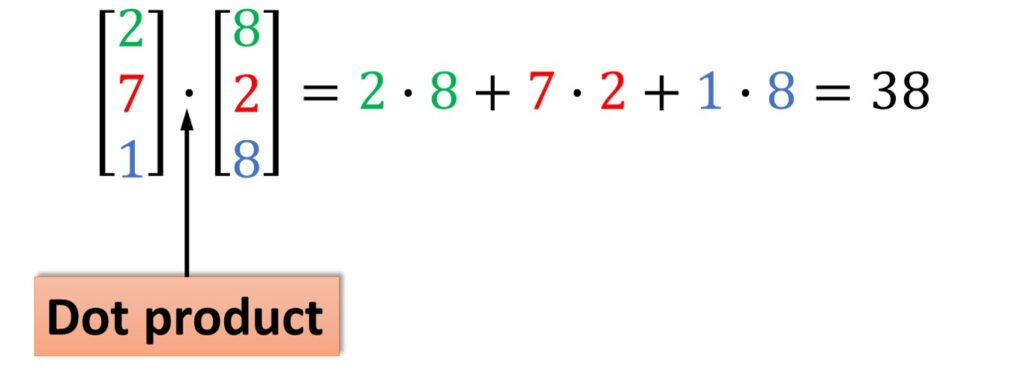

In [282]:
display(Image('/content/drive/MyDrive/Colab Files/vector product.jpg'))

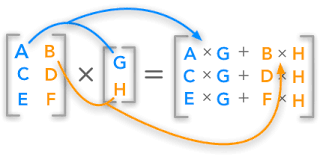

In [283]:
display(Image('/content/drive/MyDrive/Colab Files/matrix product.png'))

In [284]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

print("v1 · v2 =", np.dot(v1, v2))
print("Using @ :", v1 @ v2)


v1 · v2 = 32
Using @ : 32


In [285]:
# 2x3 matrix A
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

# 3x2 matrix C
C = np.array([
    [1, 0],
    [0, 1],
    [1, 1]
])

print("A @ C =\n", A @ C)


A @ C =
 [[ 4  5]
 [10 11]]


In [445]:
try:
    A @ A
except Exception as e:
    print("Error:", e)


Error: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)


In [457]:
a = np.array([[1],[2],[3]])
b = np.array([1,2,3])
c = np.array([[1,2,3]])
d = np.array([1,2,3,4])
print(a.shape)
print(b.shape)
print(c.shape)
print(b @ b)
print(c @ a)

(3, 1)
(3,)
(1, 3)
14
[[14]]


In [287]:
I = np.eye(3)
I


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [288]:
M = np.array([[2, 3, 4],
              [1, 0, -1],
              [5, 2, 2]])

print("M @ I =\n", M @ I)
print("\nI @ M =\n", I @ M)


M @ I =
 [[ 2.  3.  4.]
 [ 1.  0. -1.]
 [ 5.  2.  2.]]

I @ M =
 [[ 2.  3.  4.]
 [ 1.  0. -1.]
 [ 5.  2.  2.]]


In [289]:
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[10, 20],
              [30, 40]])

print("Elementwise A * B =\n", A * B)
print("\nMatrix A @ B =\n", A @ B)


Elementwise A * B =
 [[ 10  40]
 [ 90 160]]

Matrix A @ B =
 [[ 70 100]
 [150 220]]


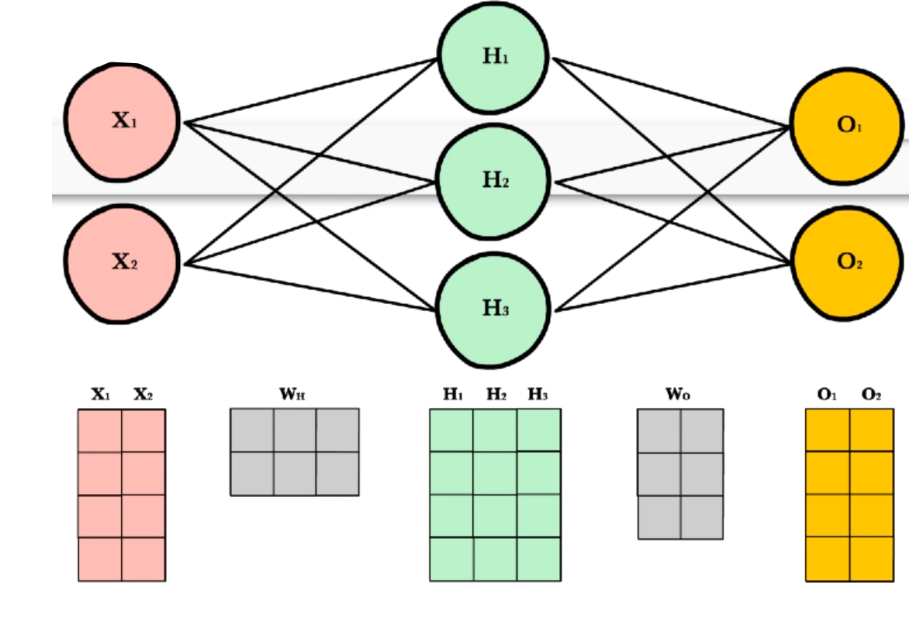

In [290]:
display(Image('/content/drive/MyDrive/Colab Files/neural network.png'))

In [291]:
# Example batch of 4 samples, each with 3 features
X = np.array([
    [0.5, 1.2, -0.3],
    [1.0, -0.2, 0.1],
    [-0.5, 2.0, 1.5],
    [0.3, 0.8, 0.0]
])

# First layer: 3 inputs → 4 hidden neurons
W1 = np.random.randn(3, 4)

# Second layer: 4 hidden neurons → 2 outputs
W2 = np.random.randn(4, 2)

print(X.shape)
print(W1.shape)
print(W2.shape)


(4, 3)
(3, 4)
(4, 2)


In [292]:
h = X @ W1   # (4×3) @ (3×4) = (4×4)

h


array([[ 2.04317618, -0.92090951, -1.69318458,  2.79459374],
       [ 0.56434878, -0.93893906,  2.09398181, -0.27514241],
       [-0.6444811 ,  0.6347545 , -3.42316087,  4.24293281],
       [ 1.0472405 , -0.49966564, -1.02531309,  1.83958937]])

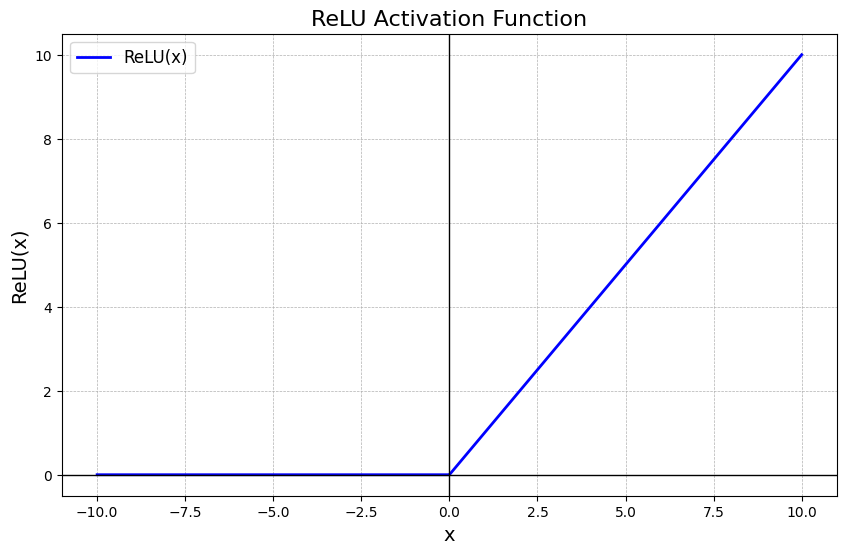

In [293]:
display(Image('/content/drive/MyDrive/Colab Files/Relu-activation-function.png'))

In [294]:
h = np.maximum(0, h)  # ReLU
h


array([[2.04317618, 0.        , 0.        , 2.79459374],
       [0.56434878, 0.        , 2.09398181, 0.        ],
       [0.        , 0.6347545 , 0.        , 4.24293281],
       [1.0472405 , 0.        , 0.        , 1.83958937]])

In [295]:
y = h @ W2   # (4×4) @ (4×2) = (4×2)
y


array([[-2.46117508, -3.47136856],
       [-0.19135154,  0.62600991],
       [-8.50726478, -1.86643415],
       [-1.97793488, -2.03117383]])

In [296]:
y_all = np.maximum(0, X @ W1) @ W2
y_all


array([[-2.46117508, -3.47136856],
       [-0.19135154,  0.62600991],
       [-8.50726478, -1.86643415],
       [-1.97793488, -2.03117383]])

In [297]:
print("X shape :", X.shape)   # (4, 3)
print("W1 shape:", W1.shape)  # (3, 4)
print("h shape :", h.shape)   # (4, 4)
print("W2 shape:", W2.shape)  # (4, 2)
print("y shape :", y.shape)   # (4, 2)


X shape : (4, 3)
W1 shape: (3, 4)
h shape : (4, 4)
W2 shape: (4, 2)
y shape : (4, 2)


### Matrix Transpose

In [298]:
print("A =\n", A)
print("\nA.T =\n", A.T)


A =
 [[1 2]
 [3 4]]

A.T =
 [[1 3]
 [2 4]]


## Meshgrid

In [299]:
x = np.linspace(-3, 3, 7)   # 7 points from -3 to 3
y = np.linspace(-2, 2, 5)   # 5 points from -2 to 2

print("x:", x)
print("y:", y)
print("x shape:", x.shape)
print("y shape:", y.shape)


x: [-3. -2. -1.  0.  1.  2.  3.]
y: [-2. -1.  0.  1.  2.]
x shape: (7,)
y shape: (5,)


In [300]:
X, Y = np.meshgrid(x, y)  # default indexing='xy'

print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("X:\n", X)
print("Y:\n", Y)


X shape: (5, 7)
Y shape: (5, 7)
X:
 [[-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]]
Y:
 [[-2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.]]


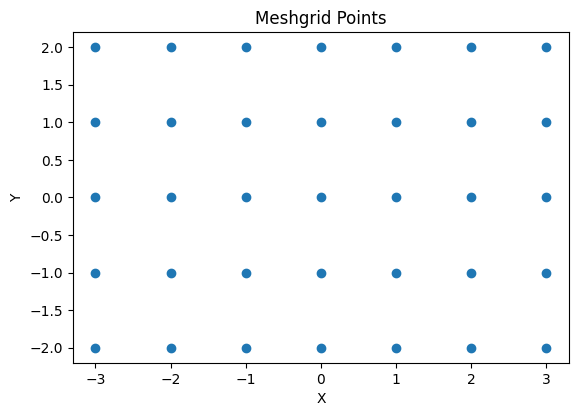

In [301]:
plt.figure()
plt.scatter(X, Y)
plt.title("Meshgrid Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().set_aspect("equal", "box")
plt.show()


In [302]:
x = np.linspace(0, 2, 3)   # [0, 1, 2]
y = np.linspace(10, 40, 4) # [10, 20, 30, 40]

X_xy, Y_xy = np.meshgrid(x, y, indexing="xy")
X_ij, Y_ij = np.meshgrid(x, y, indexing="ij")

print("indexing='xy':")
print("X_xy shape:", X_xy.shape)
print("Y_xy shape:", Y_xy.shape)

print("\nindexing='ij':")
print("X_ij shape :", X_ij.shape)
print("Y_ij shape :", Y_ij.shape)


indexing='xy':
X_xy shape: (4, 3)
Y_xy shape: (4, 3)

indexing='ij':
X_ij shape : (3, 4)
Y_ij shape : (3, 4)


In [303]:
print("X_xy:\n", X_xy)
print("Y_xy:\n", Y_xy)

print("\nX_ij:\n", X_ij)
print("Y_ij:\n", Y_ij)


X_xy:
 [[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]
Y_xy:
 [[10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]
 [40. 40. 40.]]

X_ij:
 [[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]]
Y_ij:
 [[10. 20. 30. 40.]
 [10. 20. 30. 40.]
 [10. 20. 30. 40.]]


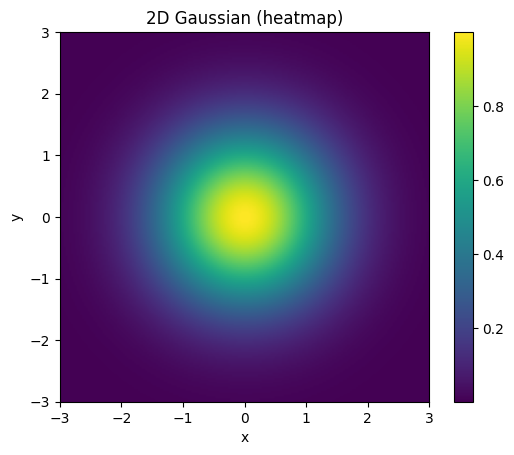

In [304]:
# Axes
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)

X, Y = np.meshgrid(x, y)

# 2D Gaussian
sigma = 1.0
Z = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

plt.figure()
plt.imshow(Z, origin="lower",
           extent=[x.min(), x.max(), y.min(), y.max()])
plt.title("2D Gaussian (heatmap)")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Satcking

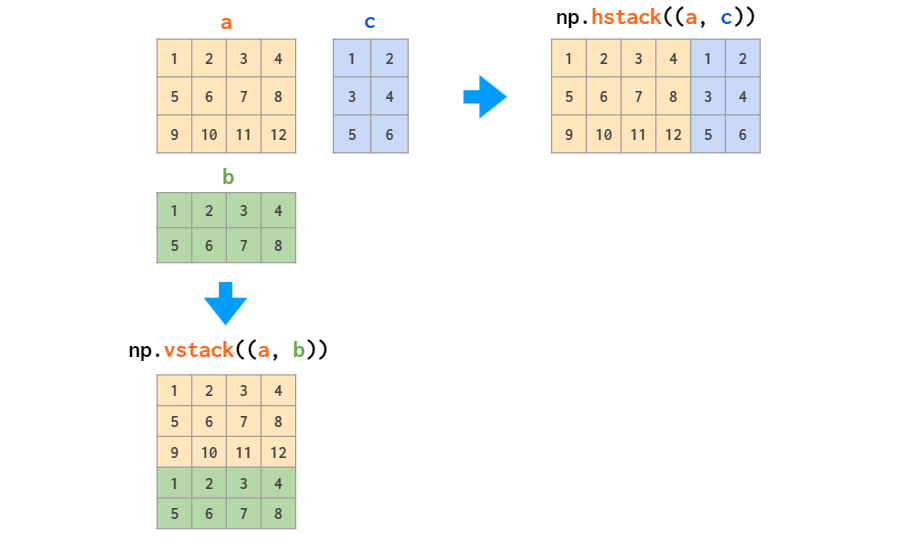

In [305]:
display(Image('/content/drive/MyDrive/Colab Files/hSM5G.png'))

In [306]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8],
              [9,10]])

print(A.shape)
print(B.shape)

H = np.hstack((A, B))
H


(2, 3)
(2, 2)


array([[ 1,  2,  3,  7,  8],
       [ 4,  5,  6,  9, 10]])

In [459]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8, 9]])

print(A.shape)
print(B.shape)

V = np.vstack((A, B))
V


(2, 3)
(1, 3)


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [308]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8, 9],
              [10,11,12]])
D = np.dstack((A, B))
D, D.shape


(array([[[ 1,  7],
         [ 2,  8],
         [ 3,  9]],
 
        [[ 4, 10],
         [ 5, 11],
         [ 6, 12]]]),
 (2, 3, 2))

In [309]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print("hstack:", np.hstack((a, b)))
print("vstack:\n", np.vstack((a, b)))
print("dstack:\n", np.dstack((a, b)))


hstack: [1 2 3 4 5 6]
vstack:
 [[1 2 3]
 [4 5 6]]
dstack:
 [[[1 4]
  [2 5]
  [3 6]]]


In [310]:
s0 = np.stack((A, B), axis=0)
s1 = np.stack((A, B), axis=1)
s2 = np.stack((A, B), axis=2)
print("\nA=\n",A)
print("\nA=\n",B)
print("\ns0=\n",s0)
print("\naxis=0 shape:", s0.shape)
print("\ns1=\n",s1)
print("\naxis=1 shape:", s1.shape)
print("s2=\n",s2)
print("\naxis=2 shape:", s2.shape)



A=
 [[1 2 3]
 [4 5 6]]

A=
 [[ 7  8  9]
 [10 11 12]]

s0=
 [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]

axis=0 shape: (2, 2, 3)

s1=
 [[[ 1  2  3]
  [ 7  8  9]]

 [[ 4  5  6]
  [10 11 12]]]

axis=1 shape: (2, 2, 3)
s2=
 [[[ 1  7]
  [ 2  8]
  [ 3  9]]

 [[ 4 10]
  [ 5 11]
  [ 6 12]]]

axis=2 shape: (2, 3, 2)


In [311]:
C = np.array([[1,2]])
D = np.array([[3,4],
              [5,6]])

try:
    np.hstack((C, D))
except Exception as e:
    print("hstack error:", e)

try:
    np.vstack((C, D))
except Exception as e:
    print("vstack error:", e)


hstack error: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 2


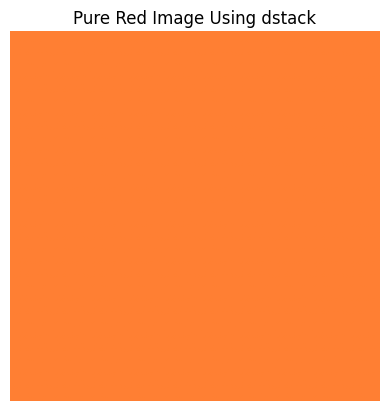

In [312]:
height, width = 200, 200

R = np.ones((height, width))      # full red
G = np.zeros((height, width))+.5     # no green
B = np.zeros((height, width))+.2     # no blue

RGB = np.stack((R, G, B),axis=2)

plt.imshow(RGB)
plt.title("Pure Red Image Using dstack")
plt.axis("off")
plt.show()


## `np.linalg`

In [313]:
v = np.array([3, 4])
A = np.array([[1, 2],
              [3, 4]])

print("Vector L2 norm:", np.linalg.norm(v))     # sqrt(3² + 4²)
print("Matrix Frobenius norm:", np.linalg.norm(A))


Vector L2 norm: 5.0
Matrix Frobenius norm: 5.477225575051661


In [314]:
A = np.array([[1, 2],
              [3, 4]])

print("Determinant:", np.linalg.det(A))


Determinant: -2.0000000000000004


In [315]:
A = np.array([[1, 2],
              [3, 4]])

A_inv = np.linalg.inv(A)
print("Inverse:\n", A_inv)

# Verify A @ A_inv = I
print("\nA @ A_inv:\n", A @ A_inv)


Inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]]

A @ A_inv:
 [[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


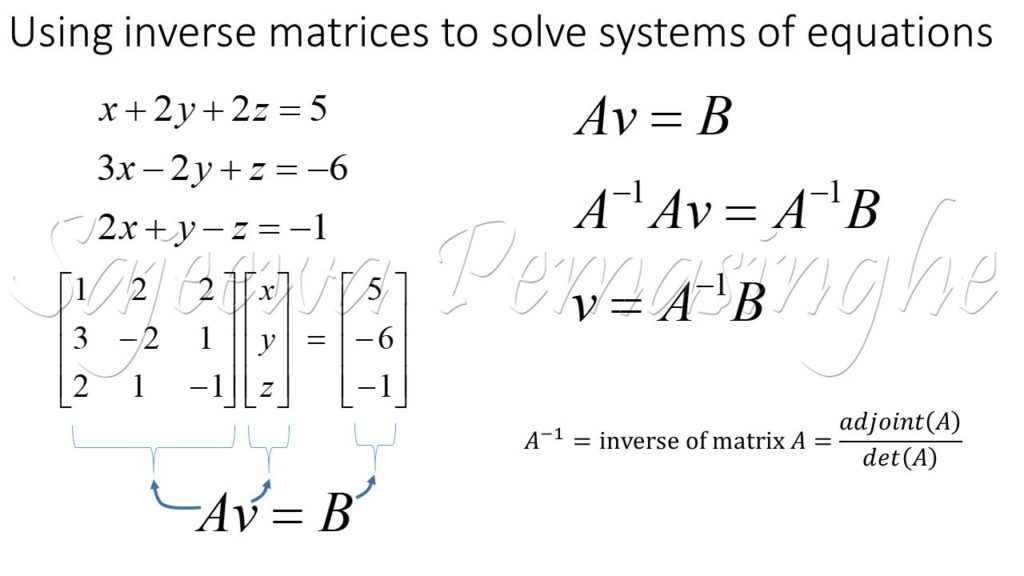

In [316]:
display(Image('/content/drive/MyDrive/Colab Files/linear_algebra_watermarked-1024x576.jpg'))

In [462]:
A = np.array([[1, 2, 2],
              [3, -2, 1],
              [2, 1, -1]])

b = np.array([5, 6, -1])

A_inv = np.linalg.inv(A)

x = A_inv @ b

print(x)
print(A @ x)

[ 0.92 -0.4   2.44]
[ 5.  6. -1.]


In [460]:
A = np.array([[1, 2, 2],
              [3, -2, 1],
              [2, 1, -1]])

b = np.array([5, 6, -1])

x = np.linalg.solve(A, b)
print("Solution x:", x)

# Check result
print("A @ x:", A @ x)


Solution x: [ 0.92 -0.4   2.44]
A @ x: [ 5.  6. -1.]


In [318]:
A = np.array([[1, 2, 3],
              [2, 4, 6],   # row 2 is a multiple of row 1
              [1, 1, 1]])

print("Rank:", np.linalg.matrix_rank(A))


Rank: 2


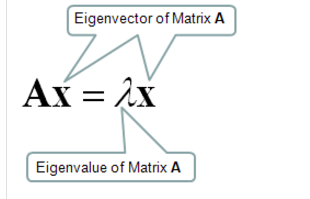

In [319]:
display(Image('/content/drive/MyDrive/Colab Files/eigen.png'))

In [320]:
A = np.array([[2, -1],
              [1,  4]])

eigvals, eigvecs = np.linalg.eig(A)

print("Eigenvalues:\n", eigvals)
print("\nEigenvectors:\n", eigvecs)


Eigenvalues:
 [3. 3.]

Eigenvectors:
 [[-0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## Broadcasting



### **Rules**

1. **Align shapes from the rightmost dimension.**
2. **Dimensions are compatible if they are equal or one of them is 1.**
3. **If any pair of dimensions is incompatible (neither equal nor 1), broadcasting fails.**
4. **The output shape is the maximum size along each dimension after stretching the 1s.**

### **Quick intuition**

> If one dimension is **1**, it repeats;
> If two dimensions differ and **neither is 1**, it's an error.

### **Examples**

* `(4,) + (1,) → (4,)`
* `(2,3) + (3,) → (2,3)`
* `(3,1) + (3,4) → (3,4)`
* `(2,3) + (2,2) → ❌ incompatible`

---


In [463]:
row = np.array([1, 2, 3])
mat = np.array([[10, 20, 30],
                [40, 50, 60]])

print(row.shape)
print(mat.shape)
print(mat + row)


(3,)
(2, 3)
[[11 22 33]
 [41 52 63]]


In [464]:
col = np.array([[1],
                [2],
                [3]])

mat = np.array([[10, 20, 30],
                [40, 50, 60],
                [70, 80, 90]])
print(col.shape)
print(mat.shape)
print(mat + col)


(3, 1)
(3, 3)
[[11 21 31]
 [42 52 62]
 [73 83 93]]


In [323]:
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9,10,11,12]])

b = np.array([[10],
              [20],
              [30]])

print(A + b)


[[11 12 13 14]
 [25 26 27 28]
 [39 40 41 42]]


In [324]:
A = np.zeros((4, 3, 2, 5))
B = np.ones((3, 1, 5))

C = A + B
print("A shape:", A.shape)
print("B shape:", B.shape)
print("C shape:", C.shape)


A shape: (4, 3, 2, 5)
B shape: (3, 1, 5)
C shape: (4, 3, 2, 5)


### 📌 Extreme Broadcasting Example

We broadcast arrays with shapes:

- **A:** (4, 3, 2, 5)  
- **B:** (3, 1, 5)

First align them from the **rightmost** dimension:

```
A: (4, 3, 2, 5)
B: ( 3, 1, 5)
```

Now compare each dimension pair from right → left:

| Dimension | A | B | Compatible? | Reason |
|----------|---|---|-------------|--------|
| last     | 5 | 5 | ✔ | equal |
| 2nd last | 2 | 1 | ✔ | B’s 1 expands to 2 |
| 3rd last | 3 | 3 | ✔ | equal |
| 4th last | 4 | — | ✔ | B has no dim → treated as 1 |

All dimensions are compatible → broadcasting happens.

### 🎯 **Result shape**
We take the **maximum** along each dimension:
```
A: (4, 3, 2, 5)
B: (1, 3, 1, 5) ← after implicit expansion

Result: (4, 3, 2, 5)
```

### 🧠 Intuition
- B is “stretched” to match A.  
- B repeats across:
  - 4 batches  
  - 2 slices  
- No actual copying → NumPy just *pretends* it's expanded.

```
Final operation:
C = A + B
C.shape == (4, 3, 2, 5)
```

# SciPy

### 🧪 What is SciPy?

**SciPy** is a scientific computing library built on top of NumPy.  
While **NumPy** focuses on fast array operations, **SciPy** provides higher-level tools used in mathematics, data science, engineering, physics, and machine learning.

SciPy contains many specialized submodules, but in this course we will focus on two essential ones:

### ✔ `scipy.linalg`
An extended linear algebra library offering:
- faster and more stable matrix operations than `np.linalg`
- solvers for linear systems
- eigenvalues, SVD, norms, decompositions

### ✔ `scipy.stats`
A comprehensive statistical library providing:
- probability distributions (normal, uniform, binomial…)
- PDFs, CDFs, random sampling
- descriptive statistics
- statistical tests (t-test, KS-test, etc.)

**In short:**  
NumPy gives you arrays.  
SciPy gives you the *mathematical tools* to do real scientific and statistical work with those arrays.


## ```linalg```

In [325]:
import scipy as sp

In [326]:
A = np.array([[3, 1],
              [1, 2]])

b = np.array([9, 8])

x = sp.linalg.solve(A, b)
print("Solution x:", x)

# check
print("A @ x =", A @ x)


Solution x: [2. 3.]
A @ x = [9. 8.]


In [327]:
A = np.array([[1, 2],
              [3, 4]])

print("det(A) =", sp.linalg.det(A))


det(A) = -2.0


In [328]:
A = np.array([[1, 2],
              [3, 4]])

A_inv = sp.linalg.inv(A)
print("A_inv:\n", A_inv)

# verify
print("\nA @ A_inv:\n", A @ A_inv)


A_inv:
 [[-2.   1. ]
 [ 1.5 -0.5]]

A @ A_inv:
 [[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In [329]:
A = np.array([[2, -1],
              [1,  4]])

eigvals, eigvecs = sp.linalg.eig(A)

print("Eigenvalues:\n", eigvals)
print("\nEigenvectors:\n", eigvecs)


Eigenvalues:
 [3.+0.j 3.+0.j]

Eigenvectors:
 [[-0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


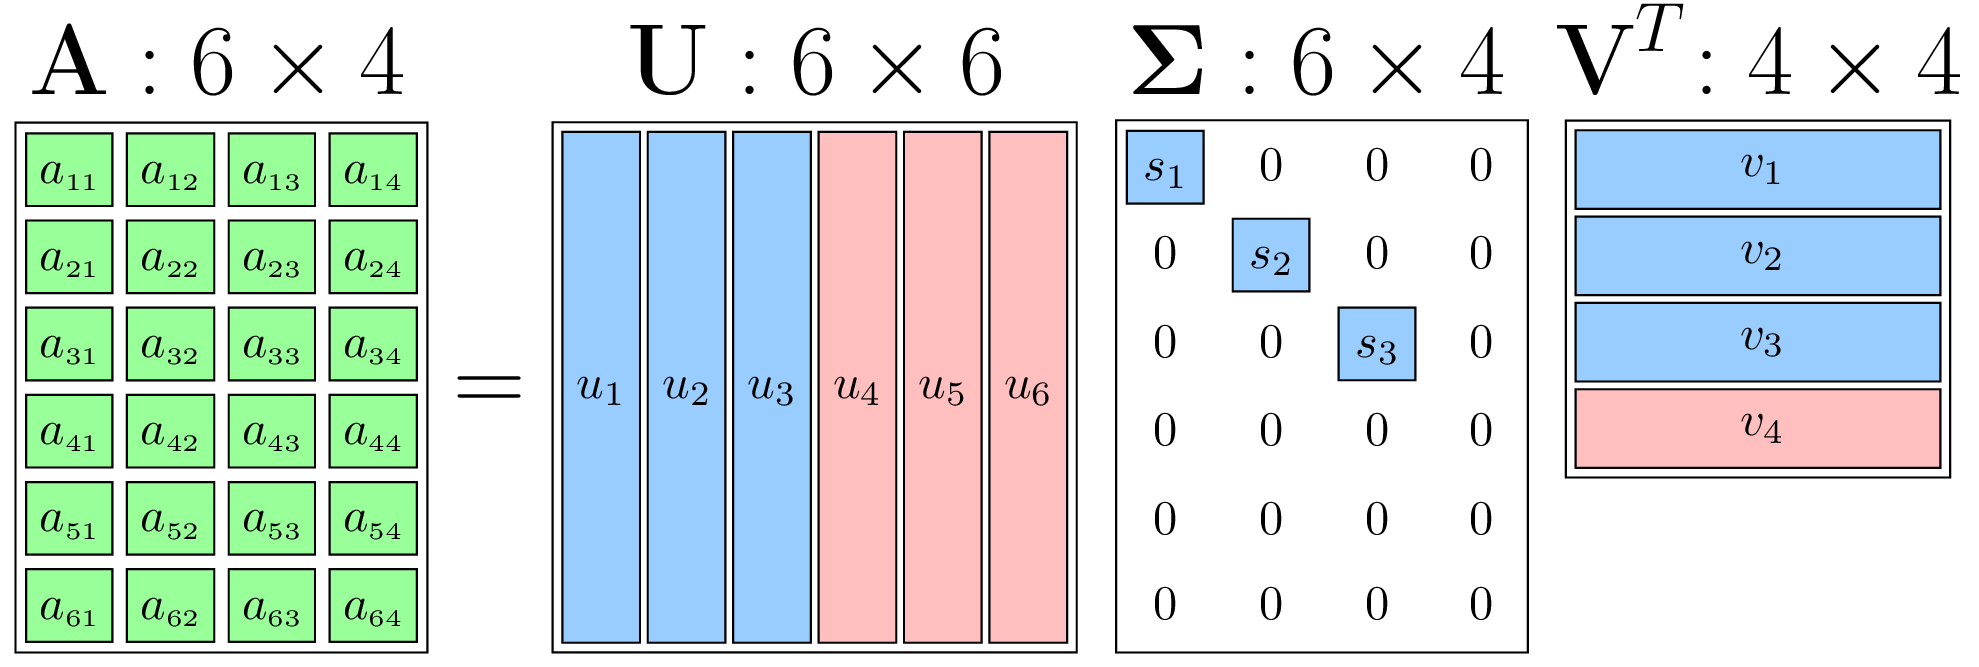

In [330]:
display(Image('/content/drive/MyDrive/Colab Files/A_decomposition.png'))

In [331]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

U, s, Vt = sp.linalg.svd(A)

print("U:\n", U)
print("\nSingular values:", s)
print("\nV^T:\n", Vt)


U:
 [[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]

Singular values: [9.508032   0.77286964]

V^T:
 [[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


## ```stats```

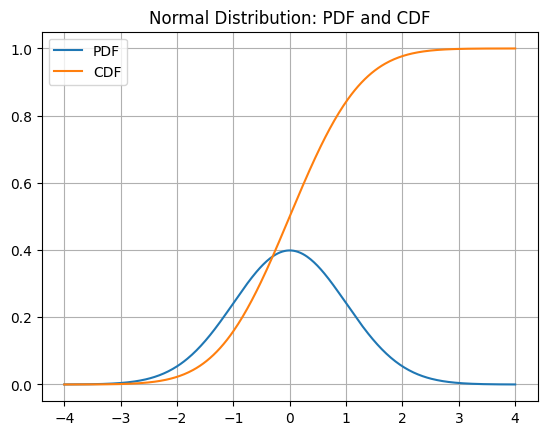

In [332]:
x = np.linspace(-4, 4, 400)

pdf = sp.stats.norm.pdf(x, loc=0, scale=1)   # standard normal (mean=0, std=1)
cdf = sp.stats.norm.cdf(x, loc=0, scale=1)

plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.title("Normal Distribution: PDF and CDF")
plt.legend()
plt.grid(True)
plt.show()


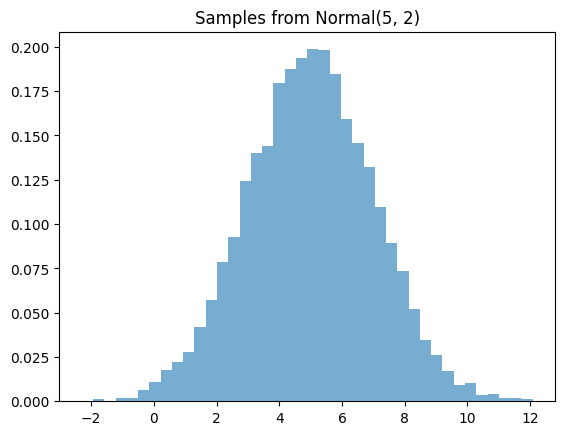

In [333]:
samples = sp.stats.norm.rvs(loc=5, scale=2, size=10_000)

plt.hist(samples, bins=40, density=True, alpha=0.6)
plt.title("Samples from Normal(5, 2)")
plt.show()


In [334]:
data = sp.stats.norm.rvs(loc=10, scale=3, size=5000)

print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Variance:", np.var(data))
print("Standard Deviation :", np.std(data))
print("Skewness:", sp.stats.skew(data))
print("Kurtosis :", sp.stats.kurtosis(data))


Mean: 9.986545069418419
Median: 9.956758939880764
Variance: 8.986926902131387
Standard Deviation : 2.9978203585490886
Skewness: -0.035163352252271345
Kurtosis : 0.029133060866284755


# Assignments

## 🟩 Assignment 1 — Image Manipulation with NumPy (Grayscale Only)

### Goal

Use NumPy **indexing, slicing, and loops** to “draw” on a grayscale image.

### Tasks

1. Create a **300 × 300** NumPy array of zeros (dtype `float`), representing a **grayscale image**.
2. Using **slicing**, draw a **white square** in the center of the image:

   * Side length: e.g. 100 pixels.
3. Using **loops**, draw a **white diagonal line** from the top-left to the bottom-right.
4. Display the final image with `matplotlib.pyplot.imshow(..., cmap="gray")`.


## 🟧 Assignment 2 — Solve this system of linear equations using numpy and scipy

```
x + 2y - 3z + 2w = 30
2x - 5y + 4z + 9w = 4
-5x + 40y - z - 20w = -6
5x - 4y - z + 60w = 5
```



## 🟥 Assignment 3 — Implement L1 and L2 Loss (Loops vs Vectorization)

You will implement two fundamental loss functions used in machine learning:

* **L1 Loss** (also called MAE — Mean Absolute Error)
* **L2 Loss** (also called MSE — Mean Squared Error)

For each loss function, you must write:

1. A **pure Python version** using **for loops**
2. A **NumPy vectorized version** (NO loops)

---

## ✔ Your tasks

### **Implement L1 Loss**

L1 loss is defined as:

$$
L_1(y, \hat{y}) = \sum_i |y_i - \hat{y}_i|
$$

#### **Function headers:**

```python
def l1_loss_loops(y, y_pred):
    """
    Compute L1 loss using pure Python for-loops.
    y: NumPy array of true values
    y_pred: NumPy array of predicted values
    Returns: scalar L1 loss
    """
    pass


def l1_loss_vectorized(y, y_pred):
    """
    Compute L1 loss using NumPy vectorized operations (NO LOOPS).
    Returns: scalar L1 loss
    """
    pass
```

---

### **Implement L2 Loss**

L2 loss is defined as:

$$
L_2(y, \hat{y}) = \sum_i (y_i - \hat{y}_i)^2
$$


#### **Function headers:**

```python
def l2_loss_loops(y, y_pred):
    """
    Compute L2 loss using pure Python for-loops.
    y: NumPy array of true values
    y_pred: NumPy array of predicted values
    Returns: scalar L2 loss
    """
    pass


def l2_loss_vectorized(y, y_pred):
    """
    Compute L2 loss using NumPy vectorized operations (NO LOOPS).
    Returns: scalar L2 loss
    """
    pass
```


## ✔ Deliverables

* Implement all four functions.
* Test them on small arrays (e.g., 5-10 elements).
* Confirm loop and vectorized versions produce identical results.

